[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


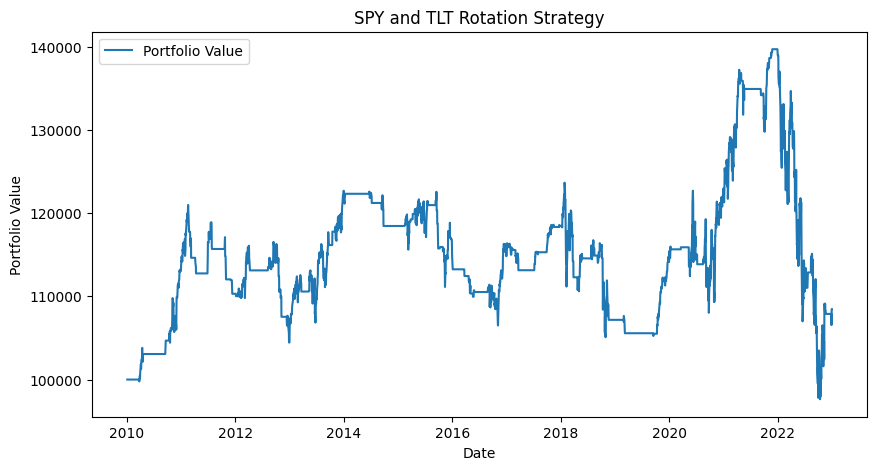

Final Portfolio Value: $108468.821836


In [2]:
#Importing Libraries
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Function to load historical data
def load_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end = end_date)
    return data['Adj Close']

# Function to backtest trading strategy

def backtest_strategy(spy_data, tlt_data, moving_avg_days):
    # Caculate moving average for TLT
    tlt_ma = tlt_data.rolling(window=moving_avg_days).mean()


    # Intitalise variables
    position = 0 # 1 for long, 0 for no position
    cash = 100000 # Initial cash in dollars
    spy_shares = 0
    portfolio_value = []

    # Loop through the data
    for i in range(len(tlt_data)):
        if i >=moving_avg_days:
            if tlt_data[i] < tlt_ma[i] and position == 0:
                # Buy SPY
                spy_shares = cash/ spy_data[i]
                cash = 0
                position = 1
            elif tlt_data[i] > tlt_ma[i] and position == 1:
                # Sell SPY
                cash = spy_shares * spy_data[i]
                spy_shares = 0
                position = 0

        # Calculate daily portfolio value
        portfolio_value.append(cash + spy_shares * spy_data[i])
        
    # Create a DataFrame for results
    results = pd.DataFrame({
        'Date': spy_data.index,
        'Portfolio Value': portfolio_value
    }).set_index('Date')

    return results 

# Main Program
if __name__ == "__main__":
    #Parameters
    start_date = '2010-01-01'
    end_date = '2023-01-01'
    moving_avg_days = 50

    # Load Data
    spy_data = load_data('SPY', start_date, end_date)
    tlt_data = load_data('TLT', start_date, end_date)

    # Backtest Strategy
    results = backtest_strategy(spy_data, tlt_data, moving_avg_days)

    # Plot results
    plt.figure(figsize=(10,5))
    plt.plot(results['Portfolio Value'], label = 'Portfolio Value')
    plt.title('SPY and TLT Rotation Strategy')
    plt.xlabel('Date')
    plt.ylabel('Portfolio Value')
    plt.legend()
    plt.show()

# Display final portfolio value
print(f"Final Portfolio Value: ${results['Portfolio Value'].iloc[-1]:2f}")